# Project 3: Monte Carlo Techniques 
## Neutron Transport and Scattering Through a Shielding Layer

Date: 25/04/23

Author: 10916086

Aim: Develop a simulation of penetration of neutrons through a slab of shilding of thickness L, considering only thermal neutrons and the processes of absorption and scattering.

In this project, monte carlo techniques will be used to simulate the movement of thermal neutrons through various materials. This is done to calculate the attenuation lenght of different materials tested. 

Monte carlo method is a computational technique that make use of random sampling to solve complex problems and estimate the final results.

In [1]:
#Initialisation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import array 
import matplotlib.animation as animation


## Objective 1

Generate arrays of numbers using the Python in-built random number generator in the numpy library

Confirm that the numbers generated are uniform over a specified range 

For a uniformly generated random number in the range of [a, b), the probability density function of the uniform distribution is

p(x) = 1 / (b - a)

In [2]:
#Global variables:

#Size of array
SIZE = 10000 

#Number of bins 
BIN = 20 

#Barn unit to cm^2
BARNS = pow(10,-24) #cm^2

#Avogadro constant
N_A = 6.022 * pow(10, 23) #mol^-1

#Thickness of slab
L = 10 #cm

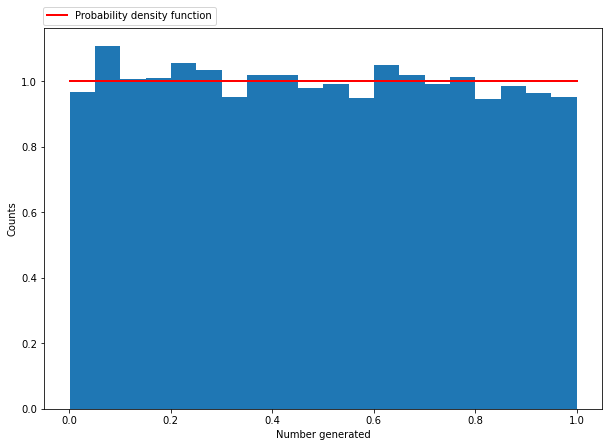

Minimum value: 0.00037150489502213446
Maximum value: 0.9999505832360035
Table of random number generated by np.random.uniform()
[0.40849076 0.24853289 0.3317154  0.96628186 0.44710064 0.34333808
 0.08990974 0.13746546 0.77085031 0.83908251 0.65358479 0.61162769
 0.46647637 0.43200539 0.85541138 0.68210482 0.92423823 0.89067926
 0.28536367 0.56087064]


In [3]:
#Array of random generated numbers
random = np.random.uniform(0,1,SIZE)

#Plot the random array onto a histogram
#Tweeking the figure size
plt.rcParams["figure.figsize"] = (10,7)
plt.figure()

#Return the number of counts and the edges of the bin 
count, bins, unimportant = plt.hist(random, BIN, density=True)

#Plot histogram and its probability density function
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r', label='Probability density function')

#Label and legend of histrogram
plt.ylabel('Counts')
plt.xlabel('Number generated')
plt.legend(loc=1, bbox_to_anchor=(0.317,1.07))
plt.show()

#Print the minimum and maximum value in the random array
print('Minimum value:', np.min(random))
print('Maximum value:', np.max(random))

#Print a table of random number generated by np.random.uniform()
print('Table of random number generated by np.random.uniform()')
print(np.random.uniform(0, 1, 20))

The minimum and maximum values generated are close to 0 and 1 respectively. This implies that the numbers are uniformly generated. 

The table of random numbers also suggest that the np.random.uniform generate numbers that are distributed uniformly. 

Furthermore, by plotting the generated numbers on a historgram, its probability density function p(x) = 1. This confirms that the number generated using numpy.random.uniform is uniformly distributed. 

As such, np.random.uniform() does not produce random numbers that are bias.

## Objective 2

Generate randomly distributed points in 3D and display the points using interactive scatter plot. Ensure that there are no spectral issues.

In [4]:
#Magic command to make the plot interactive
%matplotlib notebook

#Function to determine if a coordinate is within a sphere of radius 1
def sphere(x, y, z):
    ax = []
    ay = []
    az = []
    
    for X, Y, Z in zip(x, y, z): 
        r = np.sqrt(X**2 + Y**2 + Z**2)
        
        if(r < 1):
            ax.append(X)
            ay.append(Y)
            az.append(Z)
            
    return ax, ay, az

#Function to plot 3D interactive scatter plot
def interactive_scatter(x, y, z, title, xlabel, ylabel, zlabel):
    #Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #Store the scatter plot object in a variable
    scatter = ax.scatter(x, y, z, color='blue', s=1)

    #Add title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    #Enable interactivity
    plt.ion()

    #Show plot
    plt.show()

#Generate random 3D points
x = np.random.uniform(-1, 1, SIZE)
y = np.random.uniform(-1, 1, SIZE)
z = np.random.uniform(-1, 1, SIZE)

#Plot labels 
uniform_random_labels = ['3D Scatter Plot (np.random.uniform)', 'X', 'Y', 'Z']

#Plot scatter points
interactive_scatter(x, y, z, *uniform_random_labels)


<IPython.core.display.Javascript object>

### Sub-objective

Use randssp.ipynb and demonstrate that it causes spectral issues.

In [5]:
#Code taken from randssp.ipynb (Blackboard Project 3 page)

"""
RANDSSP Multiplicative congruential uniform random number generator.
Based on the parameters used by IBM's Scientific Subroutine Package.
The statement
r = randssp(m,n)
generates an m-by-n random matrix.
The function can not accept any other starting seed.

This function uses the "bad" generator parameters that IBM
used in several libraries in the 1960's.  There is a strong
serial correlation between three consecutive values.
"""
def randssp(p,q):
    #Changing the variable name from x to o since x has been defined previously
    global m, a, c, o 
        
    try: o
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        o = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            o = np.mod(a*o + c, m)
            r[k, l] = o/m
    
    return r


#Store generated random numbers into a variable
random_randssp = randssp(3, SIZE) 

#Determine if the randomly generated coordinates are within a sphere
x, y, z = random_randssp[0], random_randssp[1], random_randssp[2]

#Plot labels 
randssp_labels = ['3D Scatter Plot (randssp)', 'X', 'Y', 'Z']

#Plot scatter points
interactive_scatter(x, y, z, *randssp_labels)



<IPython.core.display.Javascript object>

By generating random x, y, z coordinates using numpy.random.uniform and plotting them on 3D scatter plot, it can be visually confirmed, from any angle, that the coordinates are uniformly distributed. The coordinates do not lie on any visible planes on the plot. 

On the other hand, by generating the coordinates using the randssp function and plotting them on 3D scatter plot above, it is visible that the coordinates are not distributed uniformly. By changing the view angle, it is visible, that the coordinates generated lie on hyperplanes. 

Random number generated using the linear congruential generators method lie on hyperplanes. This is clearly visible mostly when the numbers are plotted in 3D or higher dimensions. The occurence of hyperplanes is because LCG uses linear operations of addition and multiplication within the 'field' produced by the modulus. This linear operations cause biasness in the number generated. 

## Objective 3

1. Generate a random number that produces samples distributed according to an exponential function exp(-x/lambda)
    
    Can be achieved by using cumulative distribution sampling method:
    
    s_i = -lambda * ln(u_i), where u_i is a random number (uniform distribution)
    
    
2. Use this random numbers to determine that the attenuation length for water is about 45 cm

Data provided for water:
1. Absorption: 0.6652 barn
2. Scattering: 103.0 barn
3. Density   : 1.00 g/cm^3
4. Molar Mass: 18.0153 g/mol

The free mean path of water is calculated by, 
1. lambda = 1/Sigma
2. Macroscopic cross section 

    Sigma = n * sigma_a , where sigma_a is the microscopic cross-section of absorption 
3. Number of absorbing molecules

    n = rho * N_A / M, where
    1. rho: Material density 
    2. M: Molar mass 
    3. N_A: Avogadro's constant

Steps to calculate the attenuation of water:
1. Calculate the free mean path of water
2. Generate random numbers that are distributed according to exponential function exp(-x/lambda), where x is uniformly distributed random number
3. In the absence of scattering, only microscopic cross-section of absorption is going to be used
4. Plot generated data onto histograms 
5. Repeat the simulation several times (12 times in this case) and calculate the mean frequency of each bins
6. Scatter plot ln(mean frequency) against bins 
7. Plot the best fit line of the scatter plot
8. Measure the gradient, m 
9. Attenuation length = -1/m

In [6]:
#Parameters of water:
#Absorption microscopic cross-section
sigma_absorption_water = 0.6652 #barns

#Scattering microscopic cross-section
sigma_scattering_water = 103.0 #barn

#Density
rho_water = 1.00 #g/cm^3

#Molar mass
M_water = 18.0153 #g/mol


In [7]:
#Function to calculate the free mean path, macroscopic absorption and scattering cross-sections
def free_mean_path(rho, M, sigma_absorption, sigma_scattering):
    #Number of absorbing material 
    n = (rho * N_A) / M #cm^-3
    #Macroscopic cross-section
    Sigma_total = n * (sigma_absorption + sigma_scattering) * BARNS #cm^-1
    #Free mean path 
    Lambda = 1/Sigma_total #cm
    
    return Lambda, n * sigma_absorption, n * sigma_scattering 

#Inverse cumulative distribution function of exponential distribution
def exponential(p, q, beta):
    """
    Function will return array of size p by q
    Probability density function of this distribution is exp(-x/beta)
    """
    #Array to store generate number
    r = np.zeros([p,q])
    
    #Loop that generate random numbers that are distributed according to exponential function 
    for i in range (0, q):
        for j in range (0, p):
            r[j, i] = -beta * np.log(np.random.uniform())
    
    return r

def mean_frequency(nbins, ntrials, limit, random_generator, beta):
    """
    Function return the mean frequency and standard deviation of mean frequency 
    nbins (int): Number of bins
    ntrials (int): Number of trial runs
    limit (int): Range of histogram
    """
    #Array to store trial run results 
    count = np.zeros((ntrials, BINS))

    #Array to store the mean frequency of each bins
    mean_freq = np.zeros(BINS)
    
    #Array to store the standard deviation of mean frequency of each bins
    std_freq = np.zeros(BINS)
    
    #Loop to run several simulations 
    for i in range(ntrials):
        #Measure the count per bins 
        temp_count, bins_edges = np.histogram(random_generator(SIZE,1,beta), bins=BINS, range=limit)
        #Store each result in count array 
        count[i] = temp_count
    #Loop to calculate the mean and standard deviation of each bin 
    for j in range(BINS):
        mean_freq[j] = np.mean(count[:,j])
        std_freq[j] = np.std(count[:,j])
        
    return mean_freq, std_freq, bins_edges


In [8]:
#Free mean path of water in the absence of scattering
lambda_water, Sigma_absorption_water, Sigma_scattering_water = free_mean_path(rho_water, M_water, sigma_absorption_water, 0)

#Number of bins
BINS = 100

#Number of trial runs
ntrials = 12

#Calculate the mean frequency and standard deviation of the results 
mean_freq, std_freq, bins_edges = mean_frequency(BINS, ntrials, (0,300), exponential, lambda_water)

#Check if NaN is present in log_mean_freq
delete = array.array('i',[])

#Loop through mean_freq to check if any of the element is equal to zero
for r in range(len(mean_freq)):
    if mean_freq[r] == 0:
        delete = np.append(delete, r)

#Delete the zero and unused elements in the array
bins_edges_fit = bins_edges[:-1]
bins_edges_fit = np.delete(bins_edges_fit, delete)
mean_freq_fit = np.delete(mean_freq, delete)
std_freq = np.delete(std_freq, delete)

#Calculate the log of mean frequency 
log_mean_freq = np.log(mean_freq_fit)

#Calculate the best fit line of the scatter plot
fit, cov = np.polyfit(bins_edges_fit, log_mean_freq, 1, cov=True, w=mean_freq_fit/std_freq)



To calculate the fluctuations of each bin.
1. Given number of samples, n
2. Probability of finding a random sample in one of the bin (Given there are nBins of bins). therefore, p = n * nBins
3. Average of samples per bin is, avg = n * p
4. Approximate fluctuations (Assuming they are normally distributed)

    Standard deviation, sigma ~ sqrt(avg)
5. Actual fluctuation is binomially distributed

    Variance(avg) = avg * (1 - p) 
    sigma = sqrt(avg * (n - avg) / n)
    
Writing this in code, standard deviation of each bin can be simply calculated using np.std (Uncertainties of mean_freq, std_freq are calculated by np.std())

The weight (w=freq_fit/std_freq) used in the polyfit means that the points with the smaller uncertainties is given more weightage over points with larger uncertainties. This is important to ensure that the polyfit take uncertainties into consideration when producing the best fit line. 

In [9]:
# Create figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

#Plot histogram
ax[0].bar(bins_edges[:-1], mean_freq, width=bins_edges[1]-bins_edges[0])
#Plot. scatter points and its uncertainties
ax[1].errorbar(bins_edges_fit, log_mean_freq, yerr=std_freq/mean_freq, fmt='x')
#Plot best fit line
ax[1].plot(bins_edges_fit, fit[0] * bins_edges_fit + fit[1], label='Gradient = {:3.3f}'.format(fit[0]))


#Add x label, y label, and legend to each subplot
ax[0].set_xlabel('Distance, x (cm)', fontsize=15)
ax[0].set_ylabel('Mean frequency, N_mean_x', fontsize=15)
ax[0].set_title('Histogram of mean frequency against distance', fontsize=15)

ax[1].set_xlabel('Bins values', fontsize=15)
ax[1].set_ylabel('log(N_mean_x)', fontsize=15)
ax[1].legend(fontsize=10)
ax[1].set_title('Best fit line', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#Calculate the attenuation length and its uncertainty
lambda_actual = -1/fit[0]
lambda_error = np.abs(np.sqrt(cov[0,0]) / fit[0]) * lambda_actual
print(r'$lambda$ = {:3.1f} +- {:3.1f} cm'.format(-1/fit[0], lambda_error))




<IPython.core.display.Javascript object>

$lambda$ = 45.0 +- 0.1 cm


As calculated above, the attenuation length of water is about 45cm. 

For the best fit line graph above, it can be seen that the uncertainties of the data get bigger the further the distance is. This is because the bigger the distance, the number of particles will decrease exponentially. Statistically, this causes a more fluctuations in the measurement of the data. As a result, the uncertainties become bigger. 

## Objective 4

1. Write function that produces isotropic unit vectors 
2. Visually assess the generated points using an interactive scatter plot to confirm that the points are uniformly distributed over a sphere

To generate uniform random points on a sphere, we need to use polar coordinates
1. r = constant 
2. x = r sin(theta) cos(psi)
3. y = r sin(theta) sin(psi)
4. z = r cos(theta)

where,
1. psi is uniform random number between 0 and 2pi
2. theta = arccos(1 - 2u)
3. u is uniform random number between 0 and 1 

theta cannot be directly generated using np.random.uniform because it will cause more points to be concentrated around the north or south pole of the sphere. This is because around the poles of the sphere, the radius of the sphere is smaller causing some points to be concentrated around there. Thus, theta has to be distributed using arccos to ensure a more uniform distribution around the sphere surface. 

In [10]:
#Function that return random cartesian coordinates on the surface of sphere that are uniformly distributed
def isotropic_polar(size):
    """
    size: How many coordinates to generate
    Function produces isotropic unit vectors 
    """
    #Generate random polar coordinates 
    u = np.random.uniform(size=(1, size)).flatten()
    theta = np.arccos(1 - 2*u)
    psi = np.random.uniform(0, 2*np.pi, size=(1, size)).flatten()
    
    #Convert polar to cartesian coordinates
    x = np.sin(theta) * np.cos(psi)
    y = np.sin(theta) * np.sin(psi)
    z = np.cos(theta)
    
    return x, y, z
    

In [11]:
#Number of random numbers to generate
SIZE = 3000

#Cartesian coordinates on the surface of sphere
x, y, z = isotropic_polar(SIZE)

#Plot labels 
isotropic_polar_labels = ['3D Scatter Plot', 'X', 'Y', 'Z']

#Plot scatter points
interactive_scatter(x, y, z, *isotropic_polar_labels)


<IPython.core.display.Javascript object>

As seen above, the points on the surface of the sphere are uniformly distributed. No points are concentrated in one particular area of the surface. 

## Objective 5 

Create a function that generates isotropic steps with lengths distributed as exp(-x,lambda) and include representative plots 

In [12]:
#Function to generate isotropic steps with lengths that are exponentially distributed 
def exponential_isotropic(size, beta):
    #Generate length according to exponential distribution 
    exponential_length = exponential(size, 1, beta)
    
    #Generate direction vectors
    iso_i, iso_j, iso_k = isotropic_polar(size)
    
    #Each coordinates is stored in their own array 
    temp = np.array(list(zip(iso_i, iso_j, iso_k)))
    
    #Loop to multiply each random direction to random length 
    for n in range(size):
        temp[n] = temp[n] * exponential_length[n]
    
    #Combine all x, y and z coordinates into individual arrays
    xi, yj, zk = np.array(list(zip(*temp)))
    
    return xi, yj, zk


#Number of random numbers to generate
SIZE = 5000
    
#Cartesian coordinates on the surface of sphere
x, y, z = exponential_isotropic(SIZE, lambda_water)

#Labels for the scatter plot
exponential_isotropic_labels = ['3D Scatter Plot', 'Distance_x/cm', 'Distance_y/cm', 'Distance_z/cm']

#Plot interactive scatter plot
interactive_scatter(x, y, z, *exponential_isotropic_labels)




<IPython.core.display.Javascript object>

As shown above, the generted coordinates have different lengths that are concentrated towards the center of the sphere. This shows that the lenghts are randomly distributed according to the exponential function. Furthermore, it can also be visually confirmed that the direction coordinates are uniformly distributed on the surface of the sphere. This is important to ensure that the neutrons can move randomly in any direction in 3D.

## Objective 6 

Determine the macroscopic absorption, scattering cross-sections and the total mean free path (lambda) for each material

1. Macroscopic absorption cross-sections:
    
    Sigma_A = n * microscopic abscorption cross-section 
2. Macroscopic scattering cross-sections:
    
    Sigma_S = n * microscopic scattering cross-section 
3. Total free mean path: The average distance a particle can travel between successive collisions with other particles or obstacles in its path
    
    lambda = 1 / (Sigma_A + Sigma_S)


In [13]:
#Parameters of lead 
#Absorption microscopic cross-section
sigma_absorption_lead = 0.158 #barn

#Scattering microscopic cross-section
sigma_scattering_lead = 11.221 #barn

#Density
rho_lead = 11.35 #g/cm^3

#Molar mass
M_lead = 207.2


In [14]:
#Parameters of Graphite:
#Absorption microscopic cross-section
sigma_absorption_graphite = 0.0045 #barns

#Scattering microscopic cross-section
sigma_scattering_graphite = 4.74 #barns

#Density
rho_graphite = 1.67 #g/cm^3

#Molar mass
M_graphite = 12.011 #g/mol

In [15]:
#Free mean path and macroscopic cross-sections of water
lambda_water, Sigma_absorption_water, Sigma_scattering_water = free_mean_path(rho_water, M_water, sigma_absorption_water, sigma_scattering_water)

#Free mean path and macroscopic cross-sections of lead
lambda_lead, Sigma_absorption_lead, Sigma_scattering_lead = free_mean_path(rho_lead, M_lead, sigma_absorption_lead, sigma_scattering_lead)

#Free mean path and macroscopic cross-sections of graphite
lambda_graphite, Sigma_absorption_graphite, Sigma_scattering_graphite = free_mean_path(rho_graphite, M_graphite, sigma_absorption_graphite, sigma_scattering_graphite)

#Print results
print('For water:')
print('Total free mean path (lambda) = {:3.3f} cm\nSigma_absorption = {:3.2e} cm^-1\nSigma_scattering = {:3.2e} cm^-1'.format(lambda_water, Sigma_absorption_water, Sigma_scattering_water ))
print('For lead:')
print('Total free mean path (lambda) = {:3.2f} cm\nSigma_absorption = {:3.2e} cm^-1\nSigma_scattering = {:3.2e} cm^-1'.format(lambda_lead, Sigma_absorption_lead, Sigma_scattering_lead ))
print('For graphite:')
print('Total free mean path (lambda) = {:3.2f} cm\nSigma_absorption = {:3.2e} cm^-1\nSigma_scattering = {:3.2e} cm^-1'.format(lambda_graphite, Sigma_absorption_graphite, Sigma_scattering_graphite ))


For water:
lambda = 0.289 cm
Sigma_absorption = 2.22e+22 cm^-1
Sigma_scattering = 3.44e+24 cm^-1
For lead:
lambda = 2.66 cm
Sigma_absorption = 5.21e+21 cm^-1
Sigma_scattering = 3.70e+23 cm^-1
For graphite:
lambda = 2.52 cm
Sigma_absorption = 3.77e+20 cm^-1
Sigma_scattering = 3.97e+23 cm^-1


## Objective 7

Visualise the random walk of a few neutrons through each material 
   1. Consider a slab of thickness L
   2. Each neutron should enter the slab perpendicularly from its left side at x = 0
   3. Initial step should be in +x direction
   4. Each step taken should be distributed according to exp(-x/lambda)
   5. For each step, check if the neutron is absorbed, scattered within the slab or escaped from it
   6. If the neutron is scattered, continue the random walk
   7. Only consider movement in the x-direction 

In [16]:
#Total macroscopic cross-section of each material 
Sigma_total_water = Sigma_absorption_water + Sigma_scattering_water
Sigma_total_lead = Sigma_absorption_lead + Sigma_scattering_lead
Sigma_total_graphite = Sigma_absorption_graphite + Sigma_scattering_graphite

#Probability of absorption and scattering:
#For water
p_absorption_water = Sigma_absorption_water / Sigma_total_water
p_scattering_water = 1 - p_absorption_water

#For lead
p_absorption_lead = Sigma_absorption_lead / Sigma_total_lead
p_scattering_lead = 1 - p_absorption_lead

#For graphite
p_absorption_graphite = Sigma_absorption_graphite / Sigma_total_graphite
p_scattering_graphite = 1 - p_absorption_graphite

In [17]:
#Check if neutron has been absorbed, scattered or left the slab 
def check_event(distance_travelled, thickness, p_absorption):
    global reflected, transmitted, absorbed
    
    if 'reflected' not in globals():
        reflected = 0

    if 'transmitted' not in globals():
        transmitted = 0

    if 'absorbed' not in globals():
        absorbed = 0
    
    #Check if neutron has been reflected 
    if distance_travelled < 0:
        reflected += 1
        return True 
    #Check if neutron has been transmitted 
    if distance_travelled > thickness:
        transmitted += 1
        return True
      
    #Generate uniform random number between 0 and 1
    u = np.random.uniform()
    
    #Check if neutron has been absorbed
    if u <= p_absorption:
        absorbed += 1
        return True 
    #Check if neutron has been scattered inside the slab 
    if u > p_absorption:
        return False 
  


In [18]:
#Function that updates the plot to create animation
def animate(frame, data, line):
    #Update the x, y coordinates of each frame
    line.set_data(data[0:2, :frame])
    #Update the z coordinate of each frame
    line.set_3d_properties(data[2, :frame])

    return line

#Function to generate the x, y, z coordinates for each step taken 
def generate_steps(beta, probability, thickness):
    #Generate the first step of the neutron 
    first_x, first_y, first_z = exponential_isotropic(1, beta)

    #Particle history in x-direction
    distance_x = np.array([0, np.abs(first_x)], dtype='float')
    distance_y = np.array([0, 0])
    distance_z = np.array([0, 0])

    #Loop to calculate the next step
    t = 1
    while True: 
    
        #Check what happened to the neutron at each step
        if check_event(distance_x[t], thickness, probability):
            break
        
        #Calculate next  step
        x, y, z = exponential_isotropic(1, beta)
        distance_x = np.append(distance_x, distance_x[t] + x)
        distance_y = np.append(distance_y, distance_y[t] + y)
        distance_z = np.append(distance_z, distance_z[t] + z)
        t += 1
    
    return np.array([distance_x, distance_y, distance_z])

#Function to determine if neutron is reflected out, transmitted through or absorbed in the slab
def event():
    #Global variables
    global reflected, transmitted, absorbed
    
    #Determine if neutron is reflected out, transmitted through or absorbed in the slab
    if reflected > 0:
        #Reset the global variables back to 0
        reflected, transmitted, absorbed = 0, 0, 0
        return 'Neutron is reflected out'
    if transmitted > 0:
        #Reset the global variables back to 0
        reflected, transmitted, absorbed = 0, 0, 0
        return 'Neutron is transmitted through'
    if absorbed > 0:
        #Reset the global variables back to 0
        reflected, transmitted, absorbed = 0, 0, 0
        return 'Neutron is absorbed'


<IPython.core.display.Javascript object>


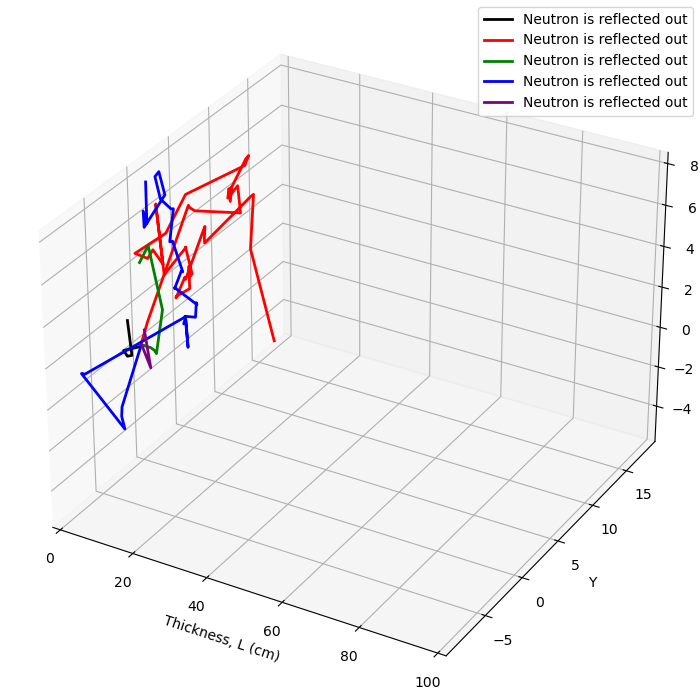

In [50]:
#Determine the size of the figure 
plt.rcParams["figure.figsize"] = [7, 7]
#Automatically adjust the subplot layouts
plt.rcParams["figure.autolayout"] = True

#Create 3D figure
fig = plt.figure()
ax = Axes3D(fig)

#Set x limit to be from 0 to L
ax.set_xlim(0, L)

#Label plot
ax.set_xlabel('Thickness, L (cm)')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Color for each line
colors = ['black', 'red', 'green', 'blue', 'purple'] 

'''Generate particle history of 5 neutrons through a graphite slab of thickness L'''
#Generate the particle history of neutron 1 and plot the animation
neutron_1 = generate_steps(lambda_graphite, p_absorption_graphite, L)
line_1, = ax.plot(neutron_1[0], neutron_1[1], neutron_1[2], lw=2, c=colors[0], label=event())
line_ani_1 = animation.FuncAnimation(fig, animate, frames=len(neutron_1[0]) + 1, fargs=(neutron_1, line_1), interval=500, blit=True, repeat=False)

#Generate the particle history of neutron 2 and plot the animation
neutron_2 = generate_steps(lambda_graphite, p_absorption_graphite, L)
line_2, = ax.plot(neutron_2[0], neutron_2[1], neutron_2[2], lw=2, c=colors[1], label=event())
line_ani_2 = animation.FuncAnimation(fig, animate, frames=len(neutron_2[0]) + 1, fargs=(neutron_2, line_2), interval=500, blit=True, repeat=False)

#Generate the particle history of neutron 3 and plot the animation
neutron_3 = generate_steps(lambda_graphite, p_absorption_graphite, L)
line_3, = ax.plot(neutron_3[0], neutron_3[1], neutron_3[2], lw=2, c=colors[2], label=event())
line_ani_3 = animation.FuncAnimation(fig, animate, frames=len(neutron_3[0]) + 1, fargs=(neutron_3, line_3), interval=500, blit=True, repeat=False)

#Generate the particle history of neutron 4 and plot the animation
neutron_4 = generate_steps(lambda_graphite, p_absorption_graphite, L)
line_4, = ax.plot(neutron_4[0], neutron_4[1], neutron_4[2], lw=2, c=colors[3], label=event())
line_ani_4 = animation.FuncAnimation(fig, animate, frames=len(neutron_4[0]) + 1, fargs=(neutron_4, line_4), interval=500, blit=True, repeat=False)

#Generate the particle history of neutron 5 and plot the animation
neutron_5 = generate_steps(lambda_graphite, p_absorption_graphite, L)
line_5, = ax.plot(neutron_5[0], neutron_5[1], neutron_5[2], lw=2, c=colors[4], label=event())
line_ani_5 = animation.FuncAnimation(fig, animate, frames=len(neutron_5[0]) + 1, fargs=(neutron_5, line_5), interval=500, blit=True, repeat=False)

#Add legend
ax.legend()

#Show animation
plt.show()

The animations above illustrate the movement of five thermal neutrons in graphite. It shows that most of the neutrons get reflected out of the slab. Repeating the animations might show that some neutrons do get transmitted or absorbed. From the animation, we can also confirmed that the movement of the neutrons are random in any direction and with step length distributed according to the exponential function. 

## Objective 8 

For N number of neutrons, determine the absorption, reflection and transmission rates.

Taking L = 10 cm 

Rates = Number of neutron / Total number of neutron samples.

In [20]:
#Function that return random cartesian x-coordinate 
def isotropic_polar_x(size):
    """
    size: How many coordinates to generate
    Function return x cartesian coordinate 
    """
    #Generate random polar coordinates 
    u = np.random.uniform(size=(1, size)).flatten()
    theta = np.arccos(1 - 2*u)
    psi = np.random.uniform(0, 2*np.pi, size=(1, size)).flatten()
    
    #Convert polar to cartesian coordinates
    x = np.sin(theta) * np.cos(psi)
    
    return x
        
#Function to generate isotropic steps with lengths that are exponentially distributed 
def exponential_isotropic_x(size, beta):
    #Generate length according to exponential distribution 
    exponential_length = exponential(size, 1, beta)
    
    #Generate direction vectors
    iso_i = isotropic_polar_x(size)
    
    #Each coordinates is stored in their own array 
    xi = np.zeros(size)
    
    #Loop to multiply each random direction to random length 
    for n in range(size):
        xi[n] = iso_i[n] * exponential_length[n]
    
    return xi

#Function to calculate the number of neutrons transmitted, reflected and absorbed
def neutron_number(beta, probability, thickness, nSamples):
    #Reset global variables reflected, transmitted or absorbed
    global reflected, transmitted, absorbed 
    reflected, transmitted, absorbed = 0, 0, 0
    
    #Count variable
    i = 0
            
    #Run simulation N times 
    while i < nSamples:
        #Variable to store the current position of the neutron in the slab
        current = np.abs(exponential_isotropic_x(1, beta))
    
        #Loop to check event at each step and update the new position of neutron if it is scattered 
        while True: 
            #Check if neutron has been absorbed, transmitted, scattered or reflected
            if check_event(current, thickness, probability):
                break
        
            #Generate next step
            x = exponential_isotropic_x(1, beta)
        
            #Update the current position of neutron
            current += x

        #Update the count variable 
        i += 1 
        
    r, t, a = reflected, transmitted, absorbed
    
    #Return the number of neutrons that are reflected, transmitted and absorbed
    return r, t, a

#Function to calculate the mean and standard deviation of the number of neutrons that are absorbed, reflected or transmitted
def mean_std(ntrials, material, thickness):
    #Empty array of size ntrials to store calculated number of neutrons 
    temp_r, temp_t, temp_a = np.zeros(ntrials), np.zeros(ntrials), np.zeros(ntrials)
    
    #Loop to calculate the number of neutrons per trial that are absorbed, reflected and transmitted
    for i in range(ntrials):
        r, t, a = neutron_number(*material, thickness, N)
        temp_r[i] = r
        temp_t[i] = t 
        temp_a[i] = a
    
    #Calculate the mean and standard deviaton of trial results and store in ntrials by 2 array
    r_data = np.array([np.mean(temp_r), np.std(temp_r)])
    t_data = np.array([np.mean(temp_t), np.std(temp_t)])
    a_data = np.array([np.mean(temp_a), np.std(temp_a)])
    
    #Return arrays
    return r_data, t_data, a_data

#Calculate the number of neutrons as percentage of the total number of samples
def calculate_rate(nSamples, data):
    #Calculate the mean rate 
    rate = data[0] / nSamples
    
    #Calculate the percentage uncertainty
    #Check if the value is zero
    if np.isclose(data[0], 0):
        error_bar = 0
    else:
        error_bar = data[1]/data[0]
    
    #Return results in an array 
    return np.array([rate, error_bar])


#Function that return the rate of absorption, reflection and transmission for a given material 
def process_data(material, thickness):
    #Calculate the mean and standard deviation of absorbtion, reflection and transmission rate of water
    r_material, t_material, a_material = mean_std(ntrials, material, thickness)

    #Calculate mean rate and its standard deviation for the material
    a_data_material = calculate_rate(N, a_material)
    r_data_material = calculate_rate(N, r_material)
    t_data_material = calculate_rate(N, t_material)
    
    return a_data_material, r_data_material, t_data_material

In [21]:
#Number of neutrons 
N = 10000
#Slab thickness
L = 10 #cm
#Number of trials
ntrials = 5

#Calculate the mean and standard deviation of absorbtion, reflection and transmission rate of water
rate_array_water = [lambda_water, p_absorption_water]
a_data_water, r_data_water, t_data_water = process_data(rate_array_water, L)

#Calculate the mean and standard deviation of absorbtion, reflection and transmission rate of lead
rate_array_lead = [lambda_lead, p_absorption_lead]
a_data_lead, r_data_lead, t_data_lead = process_data(rate_array_lead, L)

#Calculate the mean and standard deviation of absorbtion, reflection and transmission rate of graphite
rate_array_graphite = [lambda_graphite, p_absorption_graphite]
a_data_graphite, r_data_graphite, t_data_graphite = process_data(rate_array_lead, L)


<IPython.core.display.Javascript object>


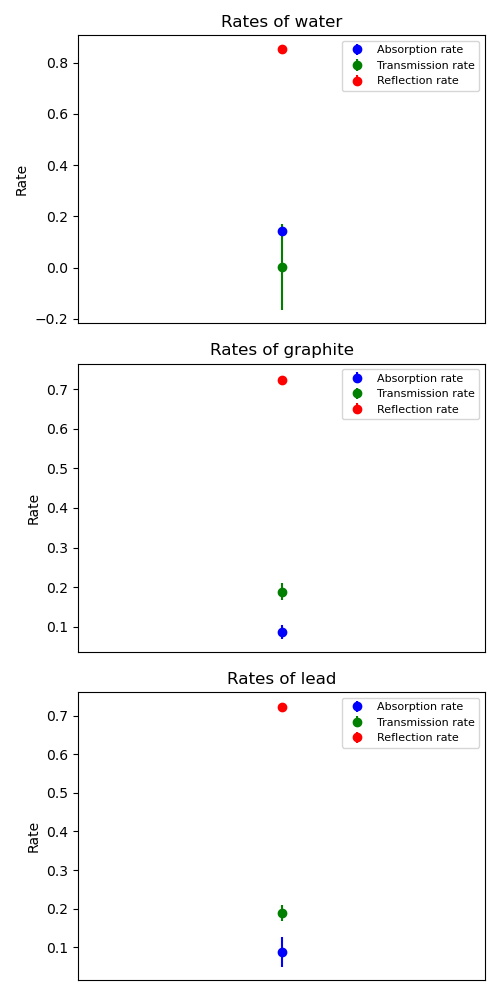

For L = 100 cm, N = 10000
For water:
Absorption rate = 0.14 +- 0.01
Reflection rate = 0.854 +- 0.002
Transmission rate = 0.002 +- 0.170
For lead:
Absorption rate = 0.09 +- 0.04
Reflection rate = 0.724 +- 0.004
Transmission rate = 0.19 +- 0.02
For graphite:
Absorption rate = 0.09 +- 0.02
Reflection rate = 0.72 +- 0.01
Transmission rate = 0.19 +- 0.02


In [49]:
#Create figure and subplots
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

#Plot rates of water and its uncertainties
ax[0].errorbar(0, a_data_water[0], yerr=a_data_water[1], fmt='bo', label='Absorption rate')
ax[0].errorbar(0, t_data_water[0], yerr=t_data_water[1], fmt='go', label='Transmission rate')
ax[0].errorbar(0, r_data_water[0], yerr=r_data_water[1], fmt='ro', label='Reflection rate')
#Plot rates graphite and its uncertainties
ax[1].errorbar(0, a_data_graphite[0], yerr=a_data_graphite[1], fmt='bo', label='Absorption rate')
ax[1].errorbar(0, t_data_graphite[0], yerr=t_data_graphite[1], fmt='go', label='Transmission rate')
ax[1].errorbar(0, r_data_graphite[0], yerr=r_data_graphite[1], fmt='ro', label='Reflection rate')
#Plot rates lead and its uncertainties
ax[2].errorbar(0, a_data_lead[0], yerr=a_data_lead[1], fmt='bo', label='Absorption rate')
ax[2].errorbar(0, t_data_lead[0], yerr=t_data_lead[1], fmt='go', label='Transmission rate')
ax[2].errorbar(0, r_data_lead[0], yerr=r_data_lead[1], fmt='ro', label='Reflection rate')

#Add x label, y label, and legend for water subplot
ax[0].set_ylabel('Rate')
ax[0].legend(fontsize=8)
ax[0].set_title('Rates of water')

#Add x label, y label, and legend for graphite subplot
ax[1].set_ylabel('Rate')
ax[1].legend(fontsize=8)
ax[1].set_title('Rates of graphite')

#Add x label, y label, and legend for lead subplot
ax[2].set_ylabel('Rate')
ax[2].legend(fontsize=8)
ax[2].set_title('Rates of lead')

# remove the x-axis ticks and labels
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[1].set_xticks([])
ax[1].set_xticklabels([])
ax[2].set_xticks([])
ax[2].set_xticklabels([])

#Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

print('For L = {:d} cm, N = {:d}'.format(L, N))

#Print results for water
print('For water:')
print('Absorption rate = {:3.2f} +- {:3.2f}'.format(a_data_water[0], a_data_water[1]))
print('Reflection rate = {:3.3f} +- {:3.3f}'.format(r_data_water[0], r_data_water[1]))
print('Transmission rate = {:3.3f} +- {:3.3f}'.format(t_data_water[0], t_data_water[1]))

#Print results for lead
print('For lead:')
print('Absorption rate = {:3.2f} +- {:3.2f}'.format(a_data_lead[0], a_data_lead[1]))
print('Reflection rate = {:3.3f} +- {:3.3f}'.format(r_data_lead[0], r_data_lead[1]))
print('Transmission rate = {:3.2f} +- {:3.2f}'.format(t_data_lead[0], t_data_lead[1]))

#Print results for graphite
print('For graphite:')
print('Absorption rate = {:3.2f} +- {:3.2f}'.format(a_data_graphite[0], a_data_graphite[1]))
print('Reflection rate = {:3.2f} +- {:3.2f}'.format(r_data_graphite[0], r_data_graphite[1]))
print('Transmission rate = {:3.2f} +- {:3.2f}'.format(t_data_graphite[0], t_data_graphite[1]))


These values above are obtained by simulating the random movements of neutrons in slab of different materials of thickness L = 10cm. The simulation produce the number of neutrons transmitted through, reflected out and absorbed by the slab. The simulation is then repeated 5 times. The number of neutrons of each event is then averaged using np.mean and its uncertainty is calculated by using np.std. 

The calculation above shows the absorption, transmission and reflection rates of thermal neutrons through water, lead and graphite. Water has the highest reflection and absorption rates among all the materials, which makes its transmission rate the lowest. 

## Objective 9 

Plot variation in neutron transmission, reflection and absorption rates with slab thickness for the three materials

The simulation performed in the previous objective is repeated several times using different values of L. The procedure is completely the same just with different values of L. 

The rates of tranmission, absorption and reflection of neutrons by each material should be exponentially distributed when the thickness is varied. This is because exponential distribution happens when every interaction of neutron and the particle of the material is independent from one other. This means that the events occuring is not influenced by the particle history or the previous event. 

In [23]:
#For water:

#Array that store a range of L value to be used to calculate the variation in rates of neutron in water
L_water = [5, 7, 10, 13, 15, 17, 20] #cm
len_L = len(L_water)

#Arrays of len(L_water) by 2, to store the variation in the rates when L is varied
absorption_water, reflection_water, transmission_water = np.zeros((len_L, 2)), np.zeros((len_L, 2)), np.zeros((len_L, 2))

#Loop to calculate the rates for various L
n = 0
for L in L_water:
    #Calculate the rates for L
    a_temp, r_temp, t_temp = process_data(rate_array_water, L)
        
    #Store results into arrays
    absorption_water[n, 0] = a_temp[0]
    absorption_water[n, 1] = a_temp[1]
    reflection_water[n, 0] = r_temp[0]
    reflection_water[n, 1] = r_temp[1]
    transmission_water[n, 0] = t_temp[0]
    transmission_water[n, 1] = t_temp[1]
    n += 1


<IPython.core.display.Javascript object>


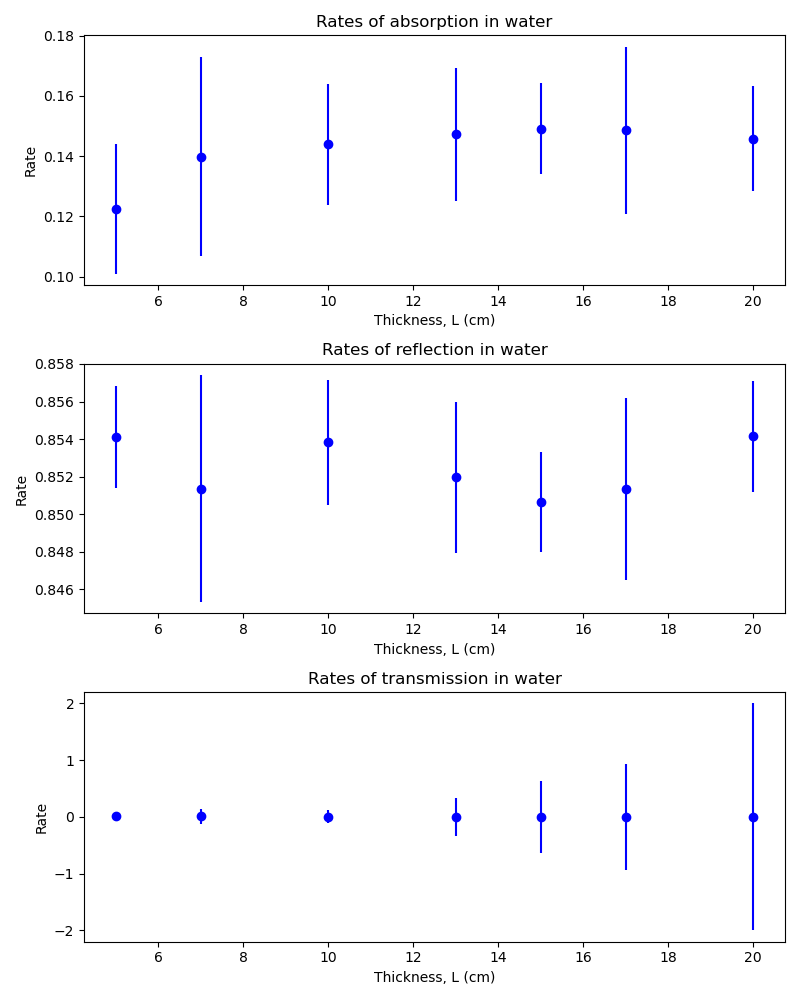

For water:
L = 5 cm N: 10000
Absorption rate: 0.12 +- 0.022 
Neutron absorbed: 1225
Reflection rate: 0.85 +- 0.003 
Neutron reflected: 8541
Transmission rate: 0.02 +- 0.057 
Neutron transmitted: 234
L = 7 cm N: 10000
Absorption rate: 0.14 +- 0.033 
Neutron absorbed: 1399
Reflection rate: 0.85 +- 0.006 
Neutron reflected: 8514
Transmission rate: 0.01 +- 0.130 
Neutron transmitted: 88
L = 10 cm N: 10000
Absorption rate: 0.14 +- 0.020 
Neutron absorbed: 1440
Reflection rate: 0.85 +- 0.003 
Neutron reflected: 8538
Transmission rate: 0.00 +- 0.112 
Neutron transmitted: 22
L = 13 cm N: 10000
Absorption rate: 0.15 +- 0.022 
Neutron absorbed: 1473
Reflection rate: 0.85 +- 0.004 
Neutron reflected: 8520
Transmission rate: 0.00 +- 0.339 
Neutron transmitted:  8
L = 15 cm N: 10000
Absorption rate: 0.15 +- 0.015 
Neutron absorbed: 1492
Reflection rate: 0.85 +- 0.003 
Neutron reflected: 8506
Transmission rate: 0.00 +- 0.632 
Neutron transmitted:  2
L = 17 cm N: 10000
Absorption rate: 0.15 +- 0.028 

In [48]:
#Create figure and subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

#Plot absorption rate of neutron in water and its percentage uncertainties
ax[0].errorbar(L_water, absorption_water[:,0], yerr=absorption_water[:, 1], fmt='bo')
#Plot reflection rate of neutron in water and its percentage uncertainties
ax[1].errorbar(L_water, reflection_water[:, 0], yerr=reflection_water[:, 1], fmt='bo')
#Plot transmission rate of neutron in water and its percentage uncertainties
ax[2].errorbar(L_water, transmission_water[:, 0], yerr=transmission_water[:, 1], fmt='bo')

#Add x label, y label, and legend for water subplot
ax[0].set_ylabel('Rate')
ax[0].set_xlabel('Thickness, L (cm)')
ax[0].set_title('Rates of absorption in water')

#Add x label, y label, and legend for water subplot
ax[1].set_ylabel('Rate')
ax[1].set_xlabel('Thickness, L (cm)')
ax[1].set_title('Rates of reflection in water')

#Add x label, y label, and legend for water subplot
ax[2].set_ylabel('Rate')
ax[2].set_xlabel('Thickness, L (cm)')
ax[2].set_title('Rates of transmission in water')

#Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

#Print result
print('For water:')
for n in range(len(L_water)):
    print('L =', L_water[n], 'cm', 'N:', N)
    print('Absorption rate: {:3.2f} +- {:3.3f} \nNeutron absorbed: {:2.0f}'.format(absorption_water[n, 0], absorption_water[n, 1], absorption_water[n, 0]*N))
    print('Reflection rate: {:3.2f} +- {:3.3f} \nNeutron reflected: {:2.0f}'.format(reflection_water[n, 0], reflection_water[n, 1], reflection_water[n, 0]*N))
    print('Transmission rate: {:3.2f} +- {:3.3f} \nNeutron transmitted: {:2.0f}'.format(transmission_water[n, 0], transmission_water[n, 1], transmission_water[n, 0]*N))


The maximum value of L used for water is 20cm. This is because when higher values of thickness, L is used, the transmission rate of water will remain 0 everytime the simulation is run. 

As can be seen above, the thicker the slab the lower the transmission and the higher the absorption rate. 

The transmission rate should be exponentially distributed. However, it cannot be seen on the plots above because the uncertainty of the value measured is too big. The uncertainty is huge due to the fact that, especially for transmission rates, the number of neutrons transmitted are small. Thus, this cause higher fluctuations when the simulation is repeated, hence the large uncertainty. 

In [25]:
#For lead:

#Array that store a range of L value to be used to calculate the variation in rates of neutron in water
L_lead = [5, 10, 25, 50, 75, 100] #cm
len_L = len(L_lead)

#Arrays of len(L_water) by 2, to store the variation in the rates when L is varied
absorption_lead, reflection_lead, transmission_lead = np.zeros((len_L, 2)), np.zeros((len_L, 2)), np.zeros((len_L, 2))

#Loop to calculate the rates for various L
n = 0
for L in L_lead:
    #Calculate the rates for L
    a_temp, r_temp, t_temp = process_data(rate_array_lead, L)
        
    #Store results into arrays
    absorption_lead[n, 0] = a_temp[0]
    absorption_lead[n, 1] = a_temp[1]
    reflection_lead[n, 0] = r_temp[0]
    reflection_lead[n, 1] = r_temp[1]
    transmission_lead[n, 0] = t_temp[0]
    transmission_lead[n, 1] = t_temp[1]
    n += 1

<IPython.core.display.Javascript object>


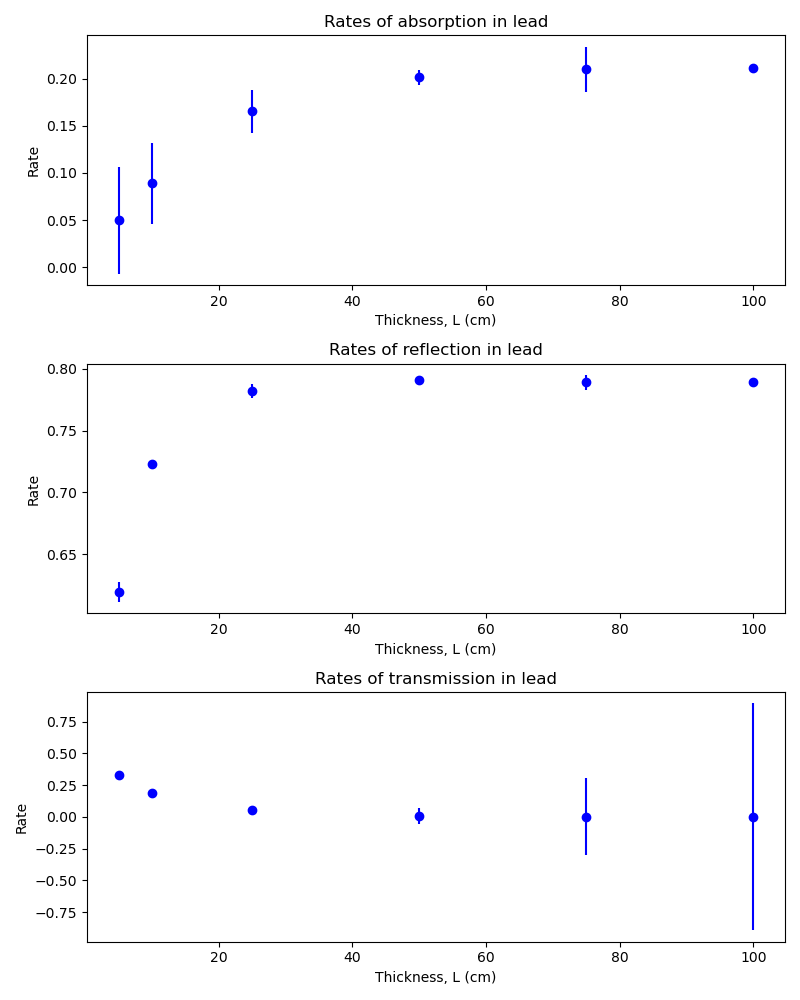

For lead:
L = 5 cm N: 10000
Absorption rate: 0.05 +- 0.056 
Neutron absorbed: 1225
Reflection rate: 0.62 +- 0.008 
Neutron reflected: 6194
Transmission rate: 0.33 +- 0.009 
Neutron transmitted: 3310
L = 10 cm N: 10000
Absorption rate: 0.09 +- 0.043 
Neutron absorbed: 1399
Reflection rate: 0.72 +- 0.002 
Neutron reflected: 7228
Transmission rate: 0.19 +- 0.012 
Neutron transmitted: 1883
L = 25 cm N: 10000
Absorption rate: 0.17 +- 0.023 
Neutron absorbed: 1440
Reflection rate: 0.78 +- 0.006 
Neutron reflected: 7823
Transmission rate: 0.05 +- 0.018 
Neutron transmitted: 525
L = 50 cm N: 10000
Absorption rate: 0.20 +- 0.008 
Neutron absorbed: 1473
Reflection rate: 0.79 +- 0.002 
Neutron reflected: 7912
Transmission rate: 0.01 +- 0.063 
Neutron transmitted: 74
L = 75 cm N: 10000
Absorption rate: 0.21 +- 0.024 
Neutron absorbed: 1492
Reflection rate: 0.79 +- 0.006 
Neutron reflected: 7890
Transmission rate: 0.00 +- 0.302 
Neutron transmitted: 13
L = 100 cm N: 10000
Absorption rate: 0.21 +- 0

In [47]:
#Create figure and subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

#Plot absorption rate of neutron in lead and its percentage uncertainties
ax[0].errorbar(L_lead, absorption_lead[:,0], yerr=absorption_lead[:, 1], fmt='bo')
#Plot reflection rate of neutron in lead and its percentage uncertainties
ax[1].errorbar(L_lead, reflection_lead[:, 0], yerr=reflection_lead[:, 1], fmt='bo')
#Plot transmission rate of neutron in lead and its percentage uncertainties
ax[2].errorbar(L_lead, transmission_lead[:, 0], yerr=transmission_lead[:, 1], fmt='bo')

#Add x label, y label, and legend for lead subplot
ax[0].set_ylabel('Rate')
ax[0].set_xlabel('Thickness, L (cm)')
ax[0].set_title('Rates of absorption in lead')

#Add x label, y label, and legend for lead subplot
ax[1].set_ylabel('Rate')
ax[1].set_xlabel('Thickness, L (cm)')
ax[1].set_title('Rates of reflection in lead')

#Add x label, y label, and legend for lead subplot
ax[2].set_ylabel('Rate')
ax[2].set_xlabel('Thickness, L (cm)')
ax[2].set_title('Rates of transmission in lead')

#Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

#Print result
print('For lead:')
for n in range(len(L_lead)):
    print('L =', L_lead[n], 'cm', 'N:', N)
    print('Absorption rate: {:3.2f} +- {:3.3f} \nNeutron absorbed: {:2.0f}'.format(absorption_lead[n, 0], absorption_lead[n, 1],absorption_water[n, 0]*N))
    print('Reflection rate: {:3.2f} +- {:3.3f} \nNeutron reflected: {:2.0f}'.format(reflection_lead[n, 0], reflection_lead[n, 1], reflection_lead[n, 0]*N))
    print('Transmission rate: {:3.2f} +- {:3.3f} \nNeutron transmitted: {:2.0f}'.format(transmission_lead[n, 0], transmission_lead[n, 1], transmission_lead[n, 0]*N))


The maximum value of L used for water is 100cm.

Similar to water, the thicker the slab the lower the transmission and the higher the absorption rate. 

For lead, it can be clearly seen that the transmission rate is exponentially distributed. The thicker the slab the lower the transmission rate will be. However, since lead requires thicker slab to reduce tranmission rate of neutron, it suggests that it has higher attenuation length than water.

In [27]:
#For graphite:

#Array that store a range of L value to be used to calculate the variation in rates of neutron in water
L_graphite = [5, 10, 25, 50, 75, 100] #cm
len_L = len(L_graphite)

#Arrays of len(L_water) by 2, to store the variation in the rates when L is varied
absorption_graphite, reflection_graphite, transmission_graphite = np.zeros((len_L, 2)), np.zeros((len_L, 2)), np.zeros((len_L, 2))

#Loop to calculate the rates for various L
n = 0
for L in L_graphite:
    #Calculate the rates for L
    a_temp, r_temp, t_temp = process_data(rate_array_graphite, L)
        
    #Store results into arrays
    absorption_graphite[n, 0] = a_temp[0]
    absorption_graphite[n, 1] = a_temp[1]
    reflection_graphite[n, 0] = r_temp[0]
    reflection_graphite[n, 1] = r_temp[1]
    transmission_graphite[n, 0] = t_temp[0]
    transmission_graphite[n, 1] = t_temp[1]
    n += 1

<IPython.core.display.Javascript object>


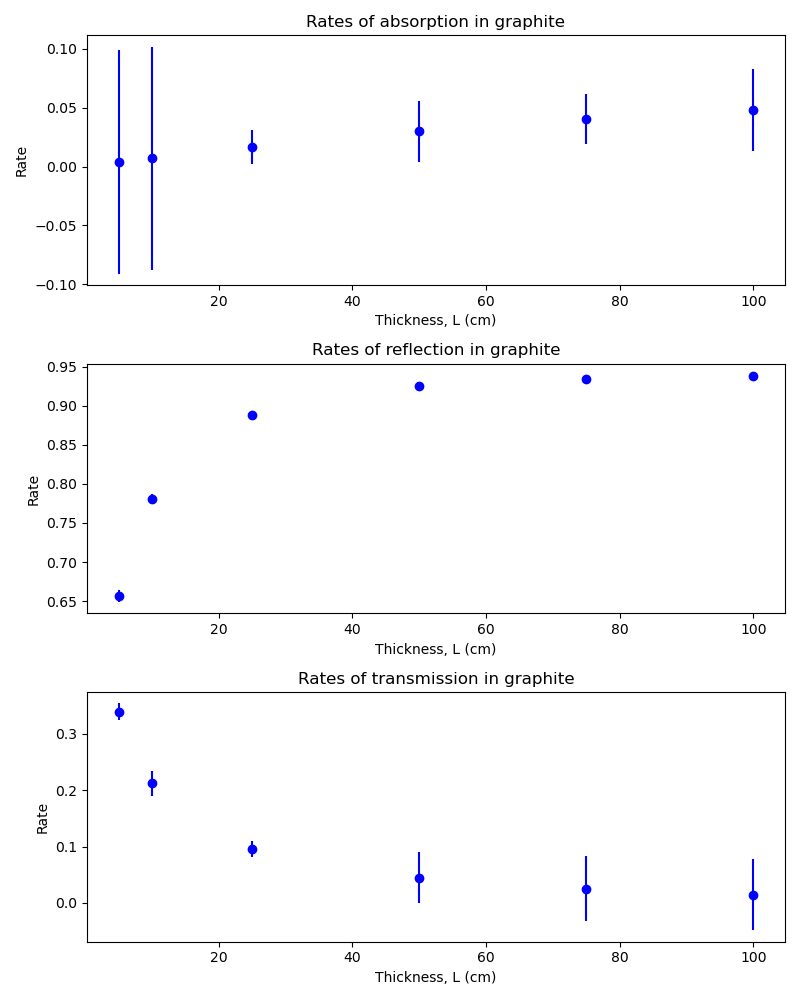

For graphite:
L = 5 cm N: 10000
Absorption rate: 0.00 +- 0.095 
Neutron absorbed: 40
Reflection rate: 0.66 +- 0.008 
Neutron reflected: 6567
Transmission rate: 0.34 +- 0.015 
Neutron transmitted: 3393
L = 10 cm N: 10000
Absorption rate: 0.01 +- 0.095 
Neutron absorbed: 68
Reflection rate: 0.78 +- 0.006 
Neutron reflected: 7809
Transmission rate: 0.21 +- 0.022 
Neutron transmitted: 2123
L = 25 cm N: 10000
Absorption rate: 0.02 +- 0.015 
Neutron absorbed: 166
Reflection rate: 0.89 +- 0.002 
Neutron reflected: 8879
Transmission rate: 0.10 +- 0.014 
Neutron transmitted: 956
L = 50 cm N: 10000
Absorption rate: 0.03 +- 0.026 
Neutron absorbed: 299
Reflection rate: 0.93 +- 0.002 
Neutron reflected: 9252
Transmission rate: 0.04 +- 0.045 
Neutron transmitted: 449
L = 75 cm N: 10000
Absorption rate: 0.04 +- 0.021 
Neutron absorbed: 402
Reflection rate: 0.93 +- 0.001 
Neutron reflected: 9346
Transmission rate: 0.03 +- 0.057 
Neutron transmitted: 252
L = 100 cm N: 10000
Absorption rate: 0.05 +- 0.

In [46]:
#Create figure and subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

#Plot absorption rate of neutron in graphite and its percentage uncertainties
ax[0].errorbar(L_graphite, absorption_graphite[:,0], yerr=absorption_graphite[:, 1], fmt='bo')
#Plot reflection rate of neutron in graphite and its percentage uncertainties
ax[1].errorbar(L_graphite, reflection_graphite[:, 0], yerr=reflection_graphite[:, 1], fmt='bo')
#Plot transmission rate of neutron in graphite and its percentage uncertainties
ax[2].errorbar(L_graphite, transmission_graphite[:, 0], yerr=transmission_graphite[:, 1], fmt='bo')

#Add x label, y label, and legend for graphite subplot
ax[0].set_ylabel('Rate')
ax[0].set_xlabel('Thickness, L (cm)')
ax[0].set_title('Rates of absorption in graphite')

#Add x label, y label, and legend for graphtie subplot
ax[1].set_ylabel('Rate')
ax[1].set_xlabel('Thickness, L (cm)')
ax[1].set_title('Rates of reflection in graphite')

#Add x label, y label, and legend for graphite subplot
ax[2].set_ylabel('Rate')
ax[2].set_xlabel('Thickness, L (cm)')
ax[2].set_title('Rates of transmission in graphite')

#Adjust spacing between subplots
fig.tight_layout()

#Show the plot
plt.show()

#Print result
print('For graphite:')
for n in range(len(L_lead)):
    print('L =', L_lead[n], 'cm', 'N:', N)
    print('Absorption rate: {:3.2f} +- {:3.3f} \nNeutron absorbed: {:2.0f}'.format(absorption_graphite[n, 0], absorption_graphite[n, 1], absorption_graphite[n, 0]*N))
    print('Reflection rate: {:3.2f} +- {:3.3f} \nNeutron reflected: {:2.0f}'.format(reflection_graphite[n, 0], reflection_graphite[n, 1], reflection_graphite[n, 0]*N))
    print('Transmission rate: {:3.2f} +- {:3.3f} \nNeutron transmitted: {:2.0f}'.format(transmission_graphite[n, 0], transmission_graphite[n, 1], transmission_graphite[n, 0]*N))


The maximum value of L used for water is 100cm.

Similar to water, the thicker the slab the lower the transmission and the higher the absorption rate. 

For graphite, it can be clearly seen that the transmission rate is exponentially distributed. The thicker the slab the lower the transmission rate will be. 

However, unlike lead and water, there are still relatively big number of neutron transmitted through the slab. This suggests that graphite has the biggest attenuation length among all the materials used in this simulation. 

## Objective 10 

Determine the characteristic attenuation lengths and their estimated errors for the three materials from their corresponding transmission rates.

Attenuation length: Distance at which the intensity of neutrons has decreased to 1/e of its initial value. 

Attenuation length is different to the free mean path that has been calculated previously. Despite being quite similar, both values represent different aspect of the interaction of neutron with the particles of the material. Attenuation length represents the length a particle can move through a material before its intensity reduces exponentially. On the other hand, free mean path is the average distance that a particle can travel before colliding or interact with the particle of the material. As a result, to calculate the attenuation length of a material, the transmission rate of neutrons through that material should be obtained first. 

Attenuation length can be calculated by using -1/m, where m is the gradient of the best fit line of ln(transmission rates) against the slab thickness. 

In [29]:
#Function that return all the necessary data to find the attenuation length using transmission rate
def attenuation_length(transmission_rate, L_array):
    """
    Inputs of function are the transmission rate data and the various L values 
    Function return the ln(transmission rate) and its uncertainty and the best fit line values
    """
    #Store value of transmission rate and its uncertainty into separate arrays
    transmission_data = transmission_rate[:, 0]
    transmission_error_bar = transmission_rate[:, 1]

    #Check if NaN is present in log_mean_freq
    delete = array.array('i',[])

    #Loop through data to check if any of the element is equal to zero
    for r in range(len(transmission_data)):
        if transmission_data[r] == 0:
            delete = np.append(delete, r)

    #Delete the zero and unused elements in the array
    transmission_data = np.delete(transmission_data, delete)
    transmission_error_bar = np.delete(transmission_error_bar, delete)
    
    #Ensure that the L_array has the same dimension
    L_fit = np.delete(L_array, delete)

    #Calculate the ln(transmission rate)
    log_t_rate = np.log(transmission_data)

    #Calculate the best fit line of the scatter plot
    fit, cov = np.polyfit(L_fit, log_t_rate, 1, cov=True, w=1/transmission_error_bar)

    return log_t_rate, transmission_error_bar, L_fit, fit, cov

#Function to plot the ln(transmission rate) results, plot best fit line and print the attenuation length 
def attenuation_length_plot(log_t_rate, error_bar, L_fit, fit, cov, title):
    # Create figure and subplots
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    #Plot histogram
    ax.errorbar(L_fit, log_t_rate, yerr=error_bar, fmt='bx')
    ax.plot(L_fit, fit[0] * L_fit + fit[1], label='Gradient = {:3.3f}'.format(fit[0]))

    #Add x label, y label, and legend to each subplot
    ax.set_xlabel('L (cm)', fontsize=15)
    ax.set_ylabel('ln(transmission rates)', fontsize=15)
    ax.legend()
    ax.set_title(title, fontsize=15)

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

    #Calculate the attenuation length and its uncertainty
    length_actual = -1/fit[0]
    length_error = np.abs(np.sqrt(cov[0,0]) / fit[0]) * length_actual
    #Print result
    print('Attenuation length of', title.lower(), '= {:3.2f} +- {:3.2f} cm'.format(-1/fit[0], length_error))
 


Note: transmission error bar = standard deviation / mean

<IPython.core.display.Javascript object>


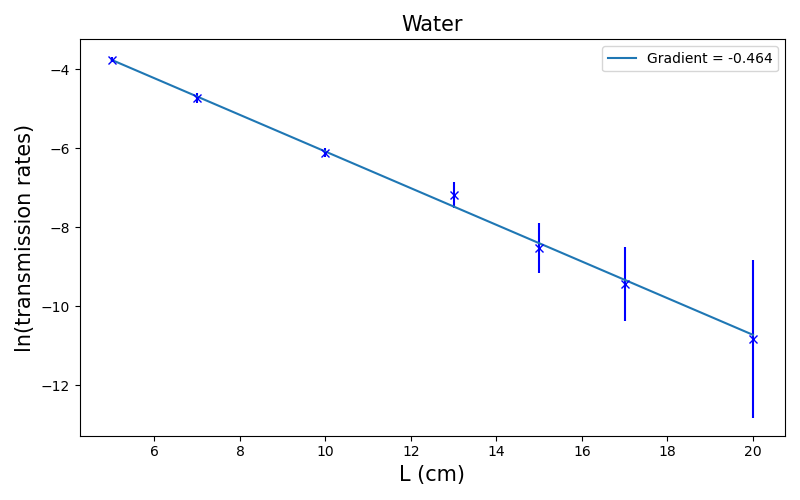

Attenuation length of water = 2.16 +- 0.04 cm


In [45]:
#Plot results and calculate the attenuation length of water
attenuation_length_plot(*attenuation_length(transmission_water, L_water), 'Water')


<IPython.core.display.Javascript object>


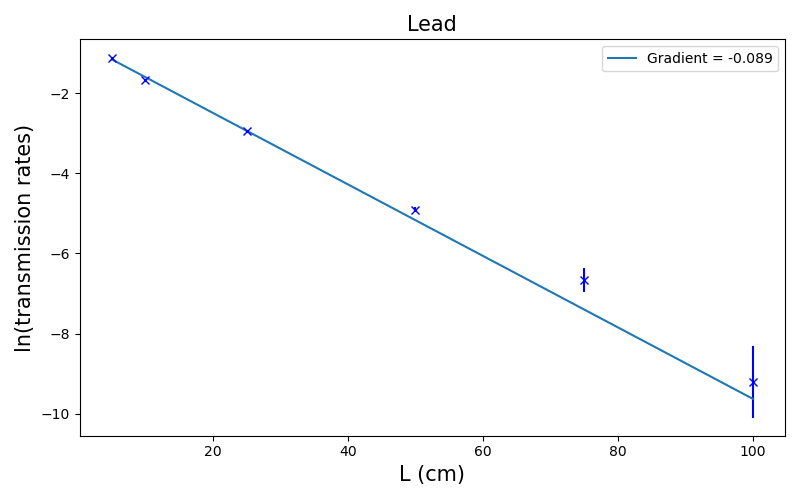

Attenuation length of lead = 11.19 +- 0.48 cm


In [44]:
#Plot results and calculate the attenuation length of lead
attenuation_length_plot(*attenuation_length(transmission_lead, L_lead), 'Lead')


<IPython.core.display.Javascript object>


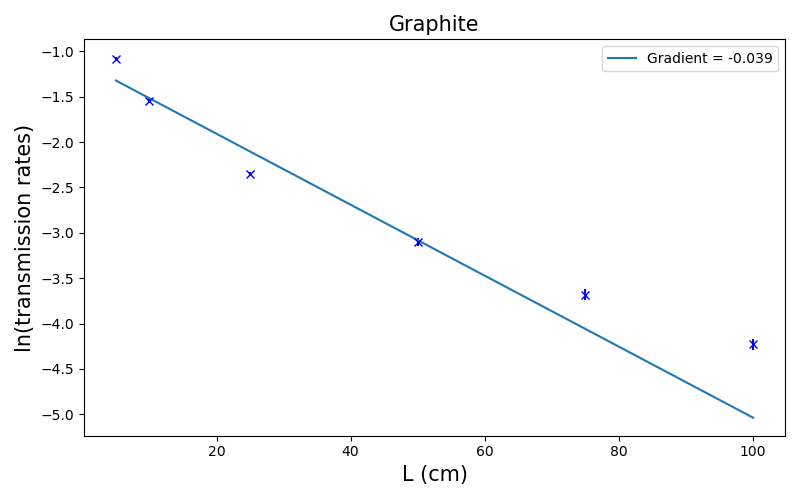

Attenuation length of graphite = 25.56 +- 4.43 cm


In [43]:
#Plot results and calculate the attenuation length of graphite
attenuation_length_plot(*attenuation_length(transmission_graphite, L_graphite), 'Graphite')


This value is obtained by plotting the log(transmission rate) against the slab thickness. 

Similar to previous objective, when weight (w=mean/std) is used in polyfit to put more weightage on points with smaller uncertainty over those with bigger ones.

As suggested from the previous data, water has the lowest attenuation length ~2cm and graphite has the highest with ~26cm. 

Water has the lowest attenuation length because water is made up of a lot of hydrogen. Hydrogen has large scattering cross section and low mass. As a result, there is higher probability that thermal neutron will interact with hydrogen atoms. Furthermore, when interaction happens, neutron would lose some of momentum causing it to lose energy (absorbed) or reflected out of the water. 



## Objective 10

Use Woodcock method to calculate the fraction of neutrons transmitted through two slabs of different materials in contact with each other (Lead and water), with each slab having a thickness of 10cm.

The Woodcock method drastically simplified the calculation needed to simulate the movements of radiation through various mediums. This method make use of fictitious and real steps that reduce calculation dramatically. Thus, making the code more efficient. Woodcock method is widely used in many simulations. For example in nuclear reactors and radiation shielding design. 

In [90]:
#Determine which sigma is the majority 
def determine_sigma(sigma_1, sigma_2):
    #Figure out which cross-section is larger between the two materials 
    if sigma_1 < sigma_2:
        #Sigma total 
        sigma_total = sigma_2
        lambda_total = 1 / sigma_2
        
        #Sigma fictitious
        sigma_fictitious = sigma_1
        lambda_fictitious = 1 / sigma_1
    if sigma_1 > sigma_2:
        #Sigma total 
        sigma_total = sigma_1
        lambda_total = 1 / sigma_1
        
        #Sigma fictitious
        sigma_fictitious = sigma_2  
        lambda_fictitious = 1 / sigma_2
    
    return sigma_total, lambda_total, sigma_fictitious, lambda_fictitious

        
#Function to check if the step taken is fictitious or not
def check_fictitious(sigma_t, sigma_f):    
    #Generate random uniform number
    u = np.random.uniform()
    
    #Probability that a step is fictitious
    probability_f = 1 - sigma_f / sigma_t
    
    #Check if step is fictitious or not 
    if u <= probability_f:
        #Step is fictitious
        return True 
    if u >= probability_f:
        #Step is real
        return False
    
def check_distance(distance_travelled, thickness_1, thickness_2):
    global reflected, transmitted, absorbed
    
    #Check if variables have been defined 
    if 'reflected' not in globals():
        reflected = 0

    if 'transmitted' not in globals():
        transmitted = 0

    if 'absorbed' not in globals():
        absorbed = 0
    
    #Check if neutron has been reflected 
    if distance_travelled < 0:
        reflected += 1
        return True 
    #Check if neutron has been transmitted 
    if distance_travelled > (thickness_1 + thickness_2):
        transmitted += 1
        return True

#Check if neutron is absorbed
def check_absorption(p_absorption):   
    #Generate uniform random number between 0 and 1
    u = np.random.uniform()
    global absorbed
    
    #Check if neutron has been absorbed
    if u <= p_absorption:
        absorbed += 1
        return True 
    #Check if neutron has been scattered inside the slab 
    if u > p_absorption:
        return False 

#Check the location of the neutron (First slab or second?)
def check_location(distance_travelled, thickness):
    #Return true if neutron is still inside the first slab
    if distance_travelled < thickness:
        return True
    

In [ ]:
#Total sigma of water and lead
total_sigma_water = Sigma_absorption_water + Sigma_scattering_water
total_sigma_lead = Sigma_absorption_lead + Sigma_scattering_lead

#Determine which one is total and minimum for Woodcock method
sigma_total, lambda_total, sigma_fictitious, lambda_fictitious = determine_sigma(total_sigma_water, total_sigma_lead)

#Determine the probability of absorption in the material with bigger sigma
if sigma_total == total_sigma_water:
    p_absorption_total = Sigma_absorption_water / sigma_total
if sigma_total == total_sigma_lead:
    p_absorption_total = Sigma_absorption_lead / sigma_total

#Slabs thickness 
L_1 = 10 #cm
L_2 = 10 #cm

#Number of neutron samples
nSamples = 10000

#Tally
reflected, transmitted, absorbed = 0, 0, 0



#Loop through nSamples of neutrons
for i in range(nSamples):
    #Step length
    length = exponential(1, 1, lambda_total)
    
    #Direction of neutron 
    direction_x, direction_y, direction_z = isotropic_polar(1)

    #Particle history in x-direction
    distance_x = np.array([0, np.abs(length.flatten() * direction_x)], dtype='float')
    distance_y = np.array([0, 0])
    distance_z = np.array([0, 0])

    
    
    #Loop to calculate the next step
    t = 1
    while True: 
    
        #Booleans 
        fictitious = check_fictitious(sigma_total, sigma_fictitious)
        location = check_location(distance_x[t], L_1)
    
        #If step is fictitious
        if fictitious and location:
            if check_distance(distance_x[t], L_1, L_2):
                break
            length = exponential(1, 1, lambda_total)
            distance_x = np.append(distance_x, distance_x[t] + length.flatten() * direction_x)
            distance_y = np.append(distance_y, distance_y[t] + length.flatten() * direction_y)
            distance_z = np.append(distance_z, distance_z[t] + length.flatten() * direction_z)
            t += 1
    
        #If step is not fictitious and within first slab
        if not fictitious and location:
            if check_distance(distance_x[t], L_1, L_2):
                break
            #Calculate next step length and move step
            direction_x, direction_y, direction_z = isotropic_polar(1)
            length = exponential(1, 1, lambda_total)
            distance_x = np.append(distance_x, distance_x[t] + length.flatten() * direction_x)
            distance_y = np.append(distance_y, distance_y[t] + length.flatten() * direction_y)
            distance_z = np.append(distance_z, distance_z[t] + length.flatten() * direction_z)
        
            if check_absorption(p_absorption_total):
                break
        
            t += 1 
        
        #Neutron is beyond first slab
        if not location:
            #Check if the neutron is absorbed or transmitted
            if check_absorption(p_absorption_total) or check_distance(distance_x[t], L_1, L_2):
                break
            #Calculate next  step
            direction_x, direction_y, direction_z = isotropic_polar(1)
            length = exponential(1, 1, lambda_total)
            distance_x = np.append(distance_x, distance_x[t] + length.flatten() * direction_x)
            distance_y = np.append(distance_y, distance_y[t] + length.flatten() * direction_y)
            distance_z = np.append(distance_z, distance_z[t] + length.flatten() * direction_z)
            t += 1
            
print('For', nSamples, 'neutrons passing through lead and water with thickness of', L_1, 'cm and', L_2, 'cm respectively,')
print('Rate of reflection = {:3.3f}'.format(reflected/nSamples))
print('Number of neutron reflected:', reflected)
print('Rate of transmission = {:3.3f}'.format(transmitted/nSamples))
print('Number of neutron transmitted:', transmitted)
print('Rate of absorption = {:3.3f}'.format(absorbed/nSamples))
print('Number of neutron absorbed:', absorbed)
